In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

## 1. 샘플 소개

In [2]:
!pip install mglearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=b8627a62d6146b299d1a2322790c4a7be03f442f1ed907ad33000c3c3a2b8163
  Stored in directory: c:\users\목지윤\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [11]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


Text(0, 0.5, '두번째 특성')

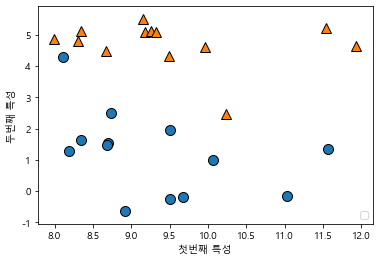

In [8]:
##### 이진 분류용 데이터셋

X, y = mglearn.datasets.make_forge()
print(X)
print(y)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0"],["클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]] [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4741103

Text(0, 0.5, '타겟')

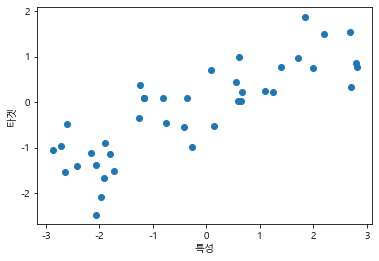

In [12]:
##### 선형 회귀용 샘플

X, y = mglearn.datasets.make_wave(n_samples=40)
print(X, y)

plt.plot(X, y,"o")
plt.xlabel("특성")
plt.ylabel("타겟")

In [17]:
cancer = load_breast_cancer()
#print(cancer)
#print(cancer.keys())
#print(cancer.data)
#print(cancer.target)
#print(cancer.DESCR)
print(type(cancer))
print(cancer.data.shape)

<class 'sklearn.utils.Bunch'>
(569, 30)


In [20]:
boston = load_boston()
boston.data.shape
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

---

## 2. 용어정리

### (1) 과대적합

+ 훈련 데이터셋의 각 샘플에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만드는 것

### (2) 과소적합

+ 너무 간단한 모델이 선택되는 것

### (3) 일반화

+ 처음보는 데이터에 대해서 정확하게 예측할 수 있는 것

### (4) 거리 측정 : L1 norm, L2 norm

+ L1 norm
    - 단순한 절대값의 거리 합
    - 맨하탄 거리
 
+ L2 norm
    - 거리의 절대값의 합에 루트 적용
    - 피타고라스 정리, 유클리드 거리

---

## 3. KNN (K- Nearest Neighbors)

### (1) 특징

+ 이해하기 쉽고 직관적인 모델
+ 더 복잡한 알고리즘은 적용하기 전에 시도해 볼 수 있는 알고리즘
+ 훈련셋이 너무많으면 예측이 느려진다.

### (2) 하이퍼 파라미터

+ 이웃의 갯수(K)
+ 데이터 사이의 거리를 측정 : L2 norm

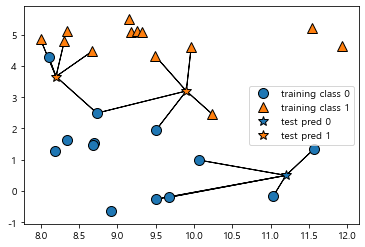

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

### (2) L1 norm, L2 norm

In [7]:
df = pd.DataFrame(np.random.randint(low=1, high=10, size=(3,2)))
df.columns = ["x", "y"]
df

,x,y
0,1,2
1,7,2
2,1,3


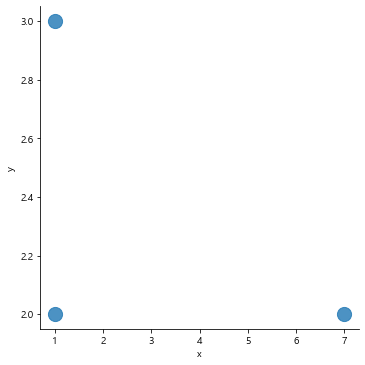

In [8]:
sns.lmplot("x", "y", data=df, fit_reg=False, scatter_kws={"s":200})

In [13]:
##### (0,0)으로부터 어디가 제일 가까울까?
# 데이터의 최단 거리를 구하는 것이기 때문에 L2 norm을 사용한다.

from numpy import linalg

val = df.values
val

linalg.norm(val, ord=2, axis=1)

array([3.31662479, 3.74165739, 2.23606798])

In [12]:
##### 3명이 주사위를 3번 던진 후 걸음 수 측정

df = pd.DataFrame(np.random.randint(low=-3, high=3, size=(3,3)))
df.columns = ["move1", "move2", "move3"]
df

,move1,move2,move3
0,-3,1,-1
1,1,-3,-2
2,2,0,-1


In [14]:
##### 누가 가장 많이 걸었을까?
# 데이터의 거리 합을 구하는 것이기 때문에 L1 norm을 사용

linalg.norm(df.values, ord=1, axis=1)

array([5., 6., 3.])

### (3) KNN 구현

In [19]:
X,y = mglearn.datasets.make_forge()
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26, 2)
(19, 2) (7, 2) (19,) (7,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
clf.predict(X_train)

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [25]:
print(y_train)

[0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]


In [26]:
clf.score(X_train, y_train)

0.9473684210526315

In [27]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [28]:
print(y_test)

[1 0 1 0 1 1 0]


In [29]:
clf.score(X_test, y_test)

0.8571428571428571

### (4) KNN 분석

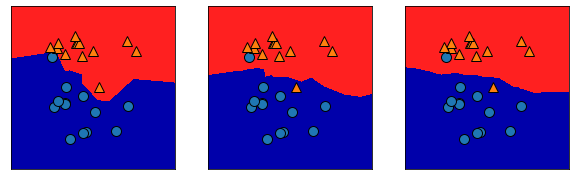

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

#clf = KNeighborsClassifier(n_neighbors=1).fit(X,y)
#mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[0])
#mglearn.plots.plot_2d_separator(clf, X, ax=axes[0], fill=True)

#clf = KNeighborsClassifier(n_neighbors=3).fit(X,y)
#mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[1])
#mglearn.plots.plot_2d_separator(clf, X, ax=axes[1], fill=True)

#clf = KNeighborsClassifier(n_neighbors=9).fit(X,y)
#mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[2])
#mglearn.plots.plot_2d_separator(clf, X, ax=axes[2], fill=True)

for n, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X,y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax, fill=True)


#### 1) 유방암 데이터셋으로 확인

In [33]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1) # random_state = seed값
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [36]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)

In [37]:
clf.score(X_train, y_train)

1.0

In [38]:
clf.score(X_test, y_test) # 과대적합

0.9230769230769231

In [39]:
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

In [40]:
clf.score(X_train, y_train)

0.9389671361502347

In [41]:
clf.score(X_test, y_test)

0.9370629370629371

#### 2) 가장 적절한 하이퍼 파라미터 선정

In [48]:
train_acc = []
test_acc = []

for n in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    

1.0


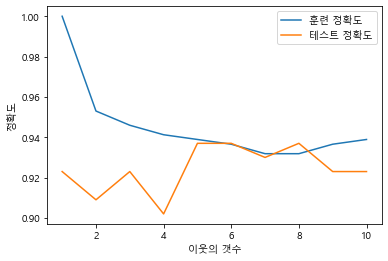

In [56]:
plt.plot(range(1, 11), train_acc, label="훈련 정확도")
plt.plot(range(1, 11), test_acc, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 갯수")
plt.legend()

### (5) 회귀분석을 위한 KNN

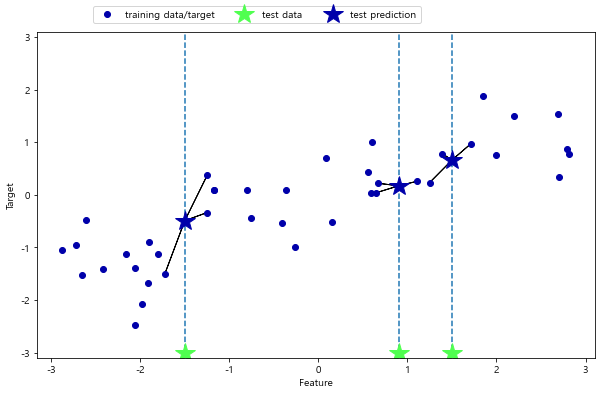

In [57]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [58]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30, 1) (10, 1) (30,) (10,)


In [59]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

In [63]:
print("학습 설명계수(R^2) : ", reg.score(X_train, y_train))

학습 설명계수(R^2) :  0.8194343929538755


In [62]:
print("테스트 설명계수(R^2) : ", reg.score(X_test, y_test))

테스트 설명계수(R^2) :  0.8344172446249605


In [64]:
X_test, y_test

(array([[-1.24713211],
        [ 0.67111737],
        [ 1.71105577],
        [-2.06388816],
        [-2.87649303],
        [-1.89957294],
        [ 0.55448741],
        [ 2.81945911],
        [-0.40832989],
        [-2.72129752]]),
 array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
        -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133]))

In [65]:
reg.predict([[1.7100557]])

array([1.13671923])

In [66]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [67]:
y_test

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

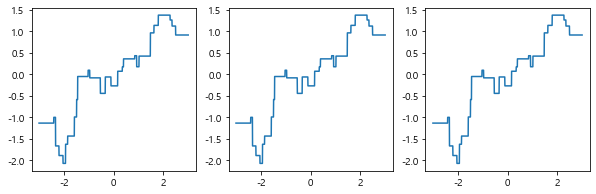

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n,ax in zip([1, 3, 9], axes):
    clf = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))


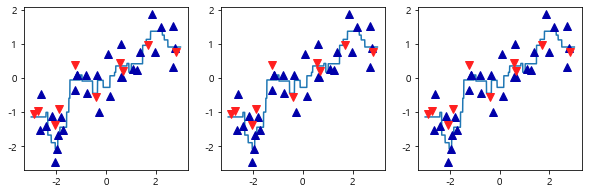

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n,ax in zip([1, 3, 9], axes):
    clf = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)

---

### (6) 응용예제1 : 붓꽃 데이터

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.target_names)
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0, test_size=.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

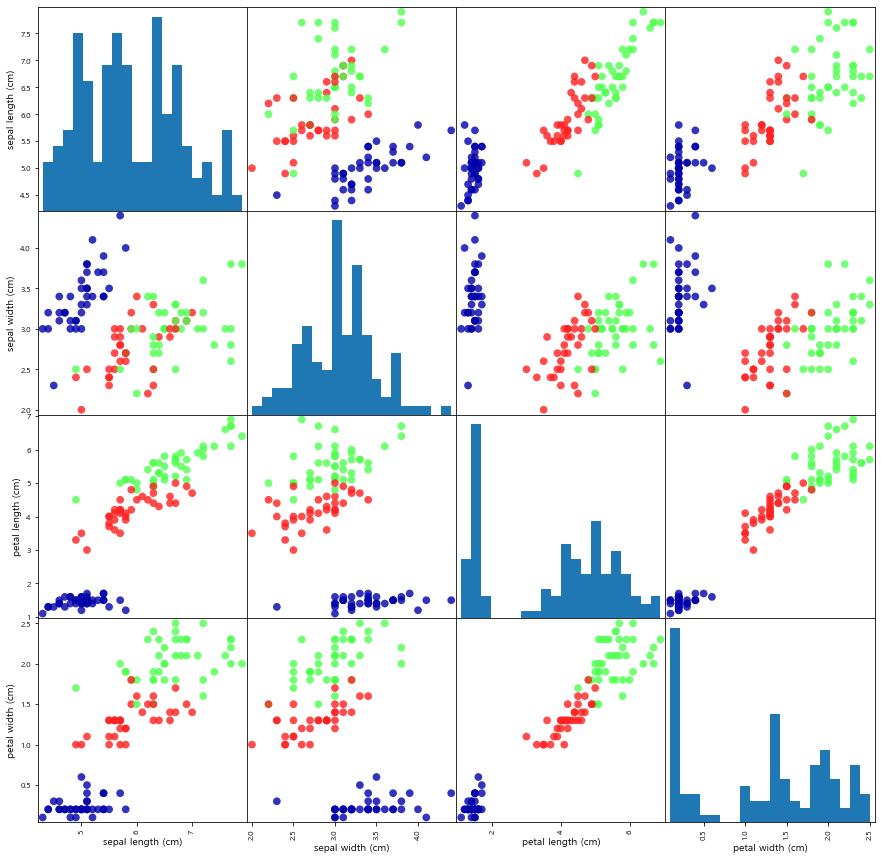

In [11]:
##### 그래프로 시각화

iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df

pd.plotting.scatter_matrix(iris_df, figsize=(15,15,), c=y_train, cmap=mglearn.cm3, s=60, 
                           marker="o", alpha=.8, hist_kwds={"bins":20})

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [15]:
print(knn.score(X_test, y_test))

pred = knn.predict(X_test)
print(np.mean(pred==y_test))

0.9736842105263158
0.9736842105263158


In [17]:
# 꽃받침(Sepal)의 길이가 5cm, 폭은 2.9cm, 꽃잎(Petal)의 길이는 1cm, 폭은 0.2cm인 붓꽃의 이름은?

s_h = 5.0
s_w = 2.9
p_h = 1.0
p_w = 0.2

pred = knn.predict([[s_h,s_w,p_h,p_w]])
pred

print("붓꽃의 품종은 ", iris.target_names[pred])

붓꽃의 품종은  ['setosa']


---

### (7) 응용예제2 : 영화 평점 데이터

---
## 3. 검증(Validation)

### (1) 훈련용(학습용) 데이터와 테스트용 데이터의 분리

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [19]:
# 훈련용 데이터 분리
X_train = iris.data[:-30]
y_train = iris.target[:-30]
print(X_train.shape, y_train.shape)

# 테스트용 데이터 분리
X_test = iris.data[-30:]
y_test = iris.target[-30:]
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [20]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split

"""
test_size : 디폴트가 0.25
train_size : 학습용 데이터를 샘플링
shuffle : 데이터를 섞어준다. 디폴트는 True
random_state : 난수값 고정
"""

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, 
                                                    random_state=0, test_size=.3, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [22]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


### (2) Cross Validation

- K fold 방식

In [9]:
from sklearn.model_selection import KFold

In [13]:
kfold = KFold(n_splits=5)
list(kfold.split(iris.data))

[(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
          82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
          95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
         108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
         121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
         147, 148, 149]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27, 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=3)

cv_accuracy = []
cnt = 0

for train_index, test_index in kfold.split(iris.data):
    #print("훈련용:",train_index)
    #print("테스트용:",test_index)
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    # 학습 및 예측 테스트
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    cnt = cnt + 1
    
    # 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    print("{}회 검증 - 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 : {}"
         .format(cnt, accuracy, X_train.shape[0], X_test.shape[0]))
    cv_accuracy.append(accuracy)
    
print("\n\n 평균 검증 정확도 :", np.mean(cv_accuracy))

1회 검증 - 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
2회 검증 - 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
3회 검증 - 정확도 : 0.8333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
4회 검증 - 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
5회 검증 - 정확도 : 0.7667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30


 평균 검증 정확도 : 0.9066599999999999


+ Stratified K 폴드
    : label의 분포가 불균형할 때

In [36]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["label"] = iris.target
iris_df.head()

iris_df["label"].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [38]:
kfold=KFold(n_splits=3)
cnt = 0

for train_index, test_index in kfold.split(iris_df):
    cnt += 1
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df["label"].iloc[test_index]    
    
    print("{}회 검증 : ", format(cnt))
    print("학습 데이터 분포 : \n",label_train.value_counts())
    print("테스트 데이터 분포: \n", label_test.value_counts())

{}회 검증 :  1
학습 데이터 분포 : 
 1    50
2    50
Name: label, dtype: int64
테스트 데이터 분포: 
 0    50
Name: label, dtype: int64
{}회 검증 :  2
학습 데이터 분포 : 
 0    50
2    50
Name: label, dtype: int64
테스트 데이터 분포: 
 1    50
Name: label, dtype: int64
{}회 검증 :  3
학습 데이터 분포 : 
 0    50
1    50
Name: label, dtype: int64
테스트 데이터 분포: 
 2    50
Name: label, dtype: int64


In [39]:
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=3)
cnt = 0

for train_index, test_index in kfold.split(iris_df, iris_df["label"]):
    cnt += 1
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df["label"].iloc[test_index]    
    
    print("{}회 검증 : ", format(cnt))
    print("학습 데이터 분포 : \n",label_train.value_counts())
    print("테스트 데이터 분포: \n", label_test.value_counts())

{}회 검증 :  1
학습 데이터 분포 : 
 2    34
0    33
1    33
Name: label, dtype: int64
테스트 데이터 분포: 
 0    17
1    17
2    16
Name: label, dtype: int64
{}회 검증 :  2
학습 데이터 분포 : 
 1    34
0    33
2    33
Name: label, dtype: int64
테스트 데이터 분포: 
 0    17
2    17
1    16
Name: label, dtype: int64
{}회 검증 :  3
학습 데이터 분포 : 
 0    34
1    33
2    33
Name: label, dtype: int64
테스트 데이터 분포: 
 1    17
2    17
0    16
Name: label, dtype: int64


- cross_val_score(), cross_validate() : 교차검증을 훨씬 간단하게 구현

In [41]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, iris.data, iris.target, scoring="accuracy", cv=5)

print("교차 검증별 정확도:", np.round(scores, 4))
print("평균 검증 정확도:", np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9667 0.9667 0.9333 0.9667 1.    ]
평균 검증 정확도: 0.9667


### (3) GridSearchCV

+ 교차검증과 최적의 하이퍼 파라미터 튜닝을 한번에 처리
+ 파라미터
    - estimator : classifier, regressor, pipeline
    - param_grid : key + 리스트 값을 가지는 dict
    - scoring : 평가지표
    - cv : 교차 검증을 위해 분할되는 학습/테스트 셋의 갯수를 지정
    - refit : 디폴트가 True, 최적의 하이퍼 파라미터를 찾은 뒤 재학습 여부

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=121, test_size=.2)
knn = KNeighborsClassifier()

In [22]:
params = {"n_neighbors": [n for n in range(1, 15) if n%2 != 0]}
grid_knn = GridSearchCV(knn, param_grid=params, cv=3)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]})

In [25]:
scores_df = pd.DataFrame(grid_knn.cv_results_)
scores_df[["params", "mean_test_score", "rank_test_score", "split0_test_score", "split1_test_score", "split2_test_score"]]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'n_neighbors': 1},0.966667,5,0.95,1.000,0.950
1,{'n_neighbors': 3},0.966667,5,0.95,1.000,0.950
2,{'n_neighbors': 5},0.975000,1,0.95,1.000,0.975
3,{'n_neighbors': 7},0.975000,1,0.95,1.000,0.975
4,{'n_neighbors': 9},0.966667,5,0.95,0.975,0.975
5,{'n_neighbors': 11},0.975000,1,0.95,1.000,0.975
6,{'n_neighbors': 13},0.975000,1,0.95,1.000,0.975


In [28]:
print("최적의 파라미터 :" , grid_knn.best_params_)
print("최고 정확도 :", grid_knn.best_score_)

최적의 파라미터 : {'n_neighbors': 5}
최고 정확도 : 0.975


In [31]:
from sklearn.metrics import accuracy_score

pred = grid_knn.predict(X_test)
print("테스트 정확도 :", accuracy_score(y_test, pred))

테스트 정확도 : 0.9666666666666667


---

## 4. 전처리

- 결측치 허용 안됨
- 문자열 허용 안됨






### (1) 문자열 해결을 위한 데이터 인코딩

- 레이블 인코딩
- 원-핫 인코딩

#### 1) 레이블 인코딩

In [35]:
from sklearn.preprocessing import LabelEncoder

items = ["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "믹서", "믹서"]

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('인코딩 변환값 : ', labels)
print('인코딩 클래스 : ', encoder.classes_)
print('디코딩 원본값 : ', encoder.inverse_transform([0,1,4,5,3,2,2]))

인코딩 변환값 :  [0 1 4 5 3 2 2]
인코딩 클래스 :  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본값 :  ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '믹서' '믹서']


#### 2) 원 핫 인코딩

- 새로운 피처를 추가해 고유값에 해당하는 컬럼에만 1을 표시하고 나머지는 0으로 표시
- 사전에 반드시 숫자로 변환이 되어있어야 한다.
- 입력값으로 2차원 데이터가 필요하다.

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
items = ["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "믹서", "믹서"]

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 배열로 변환
labels = labels.reshape(-1, 1) # 열은 1열, 행은 그에맞게 

one = OneHotEncoder()
one.fit(labels)
ot = one.transform(labels)

print("원-핫 인코딩 데이터")
print(ot.toarray())
print("크기:", ot.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
크기: (7, 6)


#### 3) get_dummies()

In [42]:
df = pd.DataFrame({"itmes":  ["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "믹서", "믹서"]})
df

pd.get_dummies(df)

,itmes_TV,itmes_냉장고,itmes_믹서,itmes_선풍기,itmes_전자렌지,itmes_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0


### (2) Feature Scaling

+ 표준화 : (Xi - mean(X)) / sd(X)
+ 정규화 : (Xi - mean(X)) / (max(X) - min(X))

#### 1) StandardScaler

In [44]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

print("feature들의 평균 : \n", df.mean())
print("---------------------------------------------------------")
print("feature들의 분산 : \n", df.var())

feature들의 평균 : 
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
---------------------------------------------------------
feature들의 분산 : 
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaler.fit(df)
iris_scaled = scaler.transform(df)

In [48]:
df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature들의 평균 : \n", df_scaled.mean())
print("---------------------------------------------------------")
print("feature들의 분산 : \n", df_scaled.var())

feature들의 평균 : 
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
---------------------------------------------------------
feature들의 분산 : 
 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 2) MinMaxScaler

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()
scaler.fit(df)
iris_scaled = scaler.transform(df)

In [51]:
df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature들의 평균 : \n", df_scaled.mean())
print("---------------------------------------------------------")
print("feature들의 분산 : \n", df_scaled.var())

feature들의 평균 : 
 sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
---------------------------------------------------------
feature들의 분산 : 
 sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


#### 3) Scaling할 때 주의할 점

In [52]:
train_data = np.arange(0,11).reshape(-1,1)
test_data = np.arange(0,6).reshape(-1,1)

print(train_data)
print(test_data)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [57]:
scaler = MinMaxScaler()
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)

print("원본 : ", train_data.reshape(-1))   # 1차원으로 돌리기
print("스케일 : ", train_scaled.reshape(-1))

print("---------------------------------------------------------------")

test_scaled = scaler.transform(test_data)

print("원본 : ", test_data.reshape(-1))   # 1차원으로 돌리기
print("스케일 : ", test_scaled.reshape(-1))



원본 :  [ 0  1  2  3  4  5  6  7  8  9 10]
스케일 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
---------------------------------------------------------------
원본 :  [0 1 2 3 4 5]
스케일 :  [0.  0.1 0.2 0.3 0.4 0.5]
